In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [11]:
df_latest = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni-latest.csv')
display(df_latest.head())

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-03-19 17:00:00,ITA,13,Abruzzo,42.351222,13.398438,181,47,228,138,366,117,8,11,385,2409
1,2020-03-19 17:00:00,ITA,17,Basilicata,40.639471,15.805148,8,5,13,24,37,10,0,0,37,353
2,2020-03-19 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,87,18,105,316,421,55,1,14,436,3568
3,2020-03-19 17:00:00,ITA,18,Calabria,38.905976,16.594402,60,13,73,91,164,38,2,3,169,2342
4,2020-03-19 17:00:00,ITA,15,Campania,40.839566,14.250850,213,36,249,356,605,182,30,17,652,3544


In [4]:
df = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')

In [5]:
#df = df.loc[:,['data','nuovi_attualmente_positivi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df.loc[:, 'numero_giorni'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-24 00:00:00", FMT)).days  )

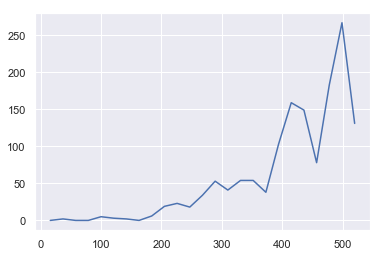

In [8]:
plt.plot(df[df.denominazione_regione == 'Toscana'].nuovi_attualmente_positivi)

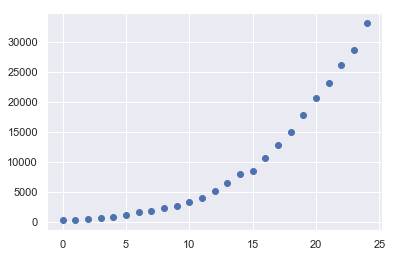

In [17]:
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)

In [18]:
def exponential_model(x,a,b):
    return a*(b**x)

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

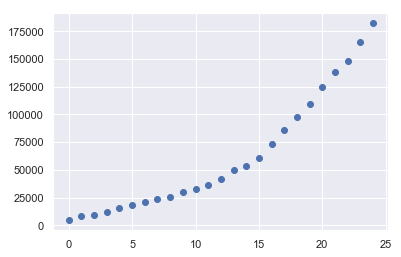

In [19]:
x = list(df.loc[:, 'numero_giorni'])
y = list(df.loc[:, 'tamponi'])
plt.scatter(x,y)

In [20]:
x = list(df.loc[:, 'numero_giorni'])
y = list(df.loc[:, 'totale_attualmente_positivi'])

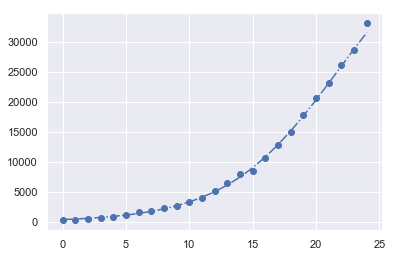

In [23]:
last_item = -1
last_day = 25
popt, pcov = curve_fit(logistic_model,x[:last_item],y[:last_item],p0=[4,70,16000])
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)
plt.plot(range(0,last_day), logistic_model(range(0,last_day), *popt), '-.')

In [24]:
logistic_model(range(0,30), *popt)

array([  364.42815683,   456.24901361,   570.94100829,   714.0521928 ,
         892.39311162,  1114.27756949,  1389.78296562,  1731.01520453,
        2152.3513167 ,  2670.61612465,  3305.1271681 ,  4077.51568947,
        5011.20466022,  6130.40617648,  7458.50498136,  9015.74348917,
       10816.23917115, 12864.55968969, 15152.33673787, 17655.64821932,
       20334.02082079, 23131.7690243 , 25981.92876451, 28812.35299018,
       31552.86283363, 34141.99348713, 36532.01185573, 38691.44501074,
       40605.07951143, 42271.97764651])

In [56]:
x[:-1]

TypeError: list indices must be integers or slices, not tuple

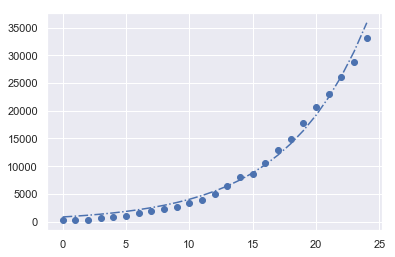

In [26]:
last_item = -1
last_day = 25
popt, pcov = curve_fit(exponential_model,x[:last_item],y[:last_item],p0=[600,1.2])
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)
plt.plot(range(0,last_day), exponential_model(range(0,last_day), *popt), '-.')

In [27]:
exponential_model(range(0,last_day), *popt)

array([  845.33941065,   988.2270139 ,  1155.2668889 ,  1350.54149079,
        1578.82333153,  1845.69162012,  2157.6686185 ,  2522.37904561,
        2948.7364256 ,  3447.16093435,  4029.83406864,  4710.99636194,
        5507.29542314,  6438.19280414,  7526.43964023,  8798.632688  ,
       10285.86435005, 12024.48257352, 14056.97919399, 16433.02843612,
       19210.70095186, 22457.88306742, 26253.93592528, 30691.63507084,
       35879.43788703])

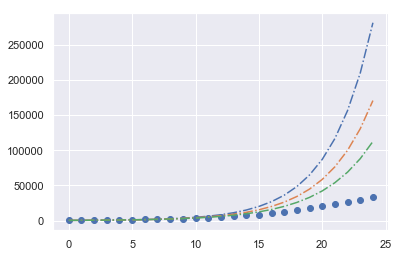

In [28]:
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)
for id in range(8,11):
    popt, pcov = curve_fit(exponential_model,x[:id],y[:id],p0=[600,1.2])
    plt.plot(df.numero_giorni, exponential_model(x, *popt), '-.')

In [29]:
x = list(df.loc[:, 'numero_giorni'])
y = list(df.loc[:, 'nuovi_attualmente_positivi'])

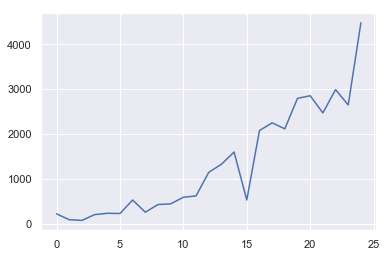

In [30]:
plt.plot(x, y)

In [36]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.13038777691761208, 0.9214759914463105, 9427.173973995392]

In [37]:
sol = int(fsolve(lambda x : logistic_model(x,errors[0],errors[1],errors[2]) - int(errors[2]),errors[1]))

In [38]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [50]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0,0,500])

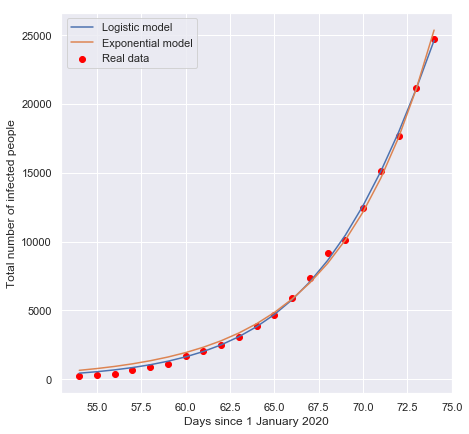

In [51]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
#plt.ylim((min(y)*0.9,c*1.1))
plt.show()